In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
%pwd

'/aiffel/aiffel/camera_sticker'

In [3]:
## 내 얼굴 가져오기

my_image_path = "./images/seowoo.jpg"  #상대경로

In [4]:
my_image_tmp = '/aiffel/aiffel/camera_sticker/images/seowoo.jpg' #절대경로

In [5]:
img_bgr = cv2.imread(my_image_tmp)

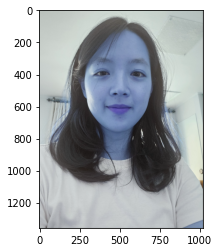

In [6]:
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

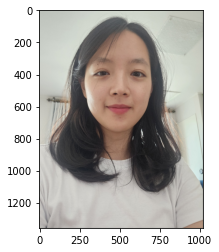

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
detector_hog = dlib.get_frontal_face_detector()

In [9]:
dlib_rects = detector_hog(img_rgb, 1) #얼굴 탐지기 사각형

In [10]:
print(dlib_rects)

rectangles[[(233, 233) (788, 788)]]


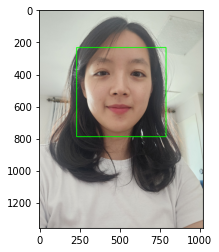

In [11]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
    

In [12]:
print(l,t,r,b)

233 233 788 788


In [13]:
model_path = './models/shape_predictor_68_face_landmarks.dat' #상대경로

In [14]:
landmark_predictor = dlib.shape_predictor(model_path)

In [15]:
list_landmarks = []  

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))


68


In [16]:
list_landmarks

[[(283, 403),
  (283, 460),
  (292, 516),
  (300, 573),
  (318, 626),
  (348, 673),
  (389, 713),
  (436, 743),
  (488, 756),
  (540, 748),
  (588, 722),
  (628, 683),
  (657, 637),
  (677, 586),
  (689, 531),
  (699, 477),
  (702, 420),
  (325, 337),
  (352, 307),
  (391, 299),
  (432, 304),
  (471, 322),
  (543, 329),
  (579, 310),
  (621, 307),
  (657, 322),
  (678, 357),
  (505, 382),
  (505, 418),
  (506, 453),
  (506, 490),
  (458, 530),
  (480, 536),
  (503, 543),
  (526, 538),
  (548, 533),
  (360, 399),
  (383, 385),
  (410, 384),
  (439, 401),
  (411, 406),
  (383, 407),
  (566, 405),
  (595, 388),
  (623, 390),
  (647, 406),
  (622, 413),
  (593, 411),
  (410, 601),
  (448, 594),
  (479, 585),
  (500, 591),
  (518, 586),
  (545, 596),
  (576, 608),
  (544, 632),
  (517, 642),
  (496, 643),
  (474, 639),
  (446, 626),
  (423, 603),
  (478, 609),
  (499, 612),
  (518, 609),
  (562, 608),
  (517, 611),
  (498, 613),
  (477, 609)]]

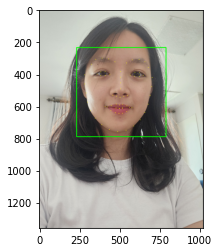

In [19]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) #실험해서 찾은 값 2
    x = landmark[33][0] 
    y = landmark[33][1] 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(503, 543)
(x,y) : (503,543)
(w,h) : (556,556)


In [21]:
sticker_path = "./images/cat_whiskers.png"

In [22]:
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

(556, 556, 3)


In [23]:
refined_x = x - w //2
refined_y = y - h//2
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (225,265)


In [24]:
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

In [25]:
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] = \
np.where(sticker_img==255, sticker_area, sticker_img).astype(np.uint8)

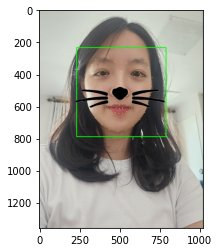

In [26]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
#여러 각도의 사진들 불러오기

my_images = []

my_image_path1, my_image_path2, my_image_path3 = "./images/seowoo_side.jpg","./images/seowoo_side_side.jpg", "./images/seowoo_distance.jpg"  
my_images = [my_image_path1,my_image_path2,my_image_path3]

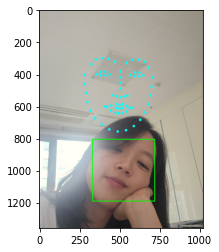

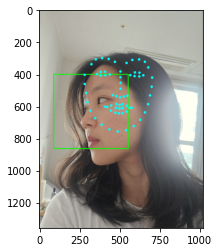

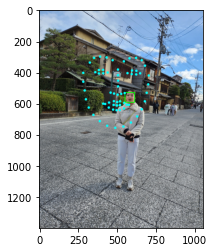

In [33]:
for image in my_images:
    img_bgr = cv2.imread(image)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    
        cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_rgb, point, 8, (0,255,255), -1)


        plt.imshow(img_rgb)
        plt.show()

    

##회고

- 그리고 나는 얼굴 각도에 따라 얼굴은 잘 찾았는데 자세히 보면 점의 요소가 제각각이다.
- 얼굴 자체는 인식하지만 요소는 잘 못찾는거 같다. 